Este script de Python realiza un Análisis de Componentes Principales (PCA) en un conjunto de datos almacenado en un archivo CSV llamado "plastic_data.csv". El objetivo del análisis es reducir la dimensionalidad del conjunto de datos, identificando y visualizando la varianza explicada por cada componente principal.

El código se puede dividir en las siguientes partes:

1. Importación de librerías:
   Se importan las librerías necesarias, como pandas, numpy, StandardScaler, PCA y matplotlib.

2. Lectura del archivo CSV:
   Se lee el archivo "plastic_data.csv" y se guarda en el DataFrame 'df'. El índice de la columna 0 se utiliza como índice del DataFrame.

3. Escalado de datos:
   Se crea una instancia de StandardScaler y se aplica a los datos para escalarlos.

4. Aplicación de PCA:
   Se crea una instancia de PCA con un número determinado de componentes (3 en este caso) y se aplica a los datos escalados. Los componentes principales resultantes se almacenan en un nuevo DataFrame llamado 'principal_df'.

5. Visualización de la varianza explicada:
   Se crea un gráfico de barras que muestra la varianza explicada por cada uno de los componentes principales. También se imprime la varianza explicada y los componentes principales en sí.

6. Gráfico de la varianza acumulativa explicada:
   Se calcula y grafica la varianza acumulativa explicada por los componentes principales. Se añade una línea horizontal en el 80% de la varianza acumulativa para identificar el número óptimo de componentes.

7. Identificación de las variables originales en cada componente principal:
   Se crea un DataFrame llamado 'components_df' que contiene las contribuciones de cada variable original en cada componente principal.

8. Impresión de las contribuciones de las variables originales:
   Se imprime la tabla que muestra las contribuciones de cada variable original en cada componente principal.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("plastic_data.csv",index_col=0)
df

,temperatura,presion,velocidad_extrusion,humedad,tiempo_enfriamiento
id,,,,,
1,75,120,2.5,5.0,10
2,80,115,2.8,4.5,11
3,85,125,2.7,5.5,9
4,82,110,2.6,4.8,10
5,78,130,2.4,5.2,12
6,76,120,2.9,4.9,11
7,81,115,2.3,5.1,9
8,83,126,2.8,4.7,10
9,79,122,2.7,5.3,8


En este ejemplo, cada fila representa una muestra y las columnas corresponden a las siguientes variables:

id: Identificador único de la muestra.
temperatura (°C): Temperatura del proceso de extrusión.
presion (kPa): Presión en el proceso de extrusión.
velocidad_extrusion (m/s): Velocidad de extrusión del plástico.
humedad (%): Humedad ambiente en la planta de producción.
tiempo_enfriamiento (s): Tiempo que tarda el plástico en enfriarse.

In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [4]:
#primero descompondremos los datos, que tienen 5 variables en 5 componentes para ayudarnos a determinar el minimo numero de 
#componentes principales
n_components=5
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)
components=[]
n=1
while n<=n_components:
    components.append("PC"+str(n))
    n=n+1
principal_df = pd.DataFrame(data=principal_components, columns=components)
explained_variance = pca.explained_variance_ratio_
print("Varianza Explicada:", explained_variance)

Varianza Explicada: [0.35145976 0.2648177  0.2176865  0.13049668 0.03553936]


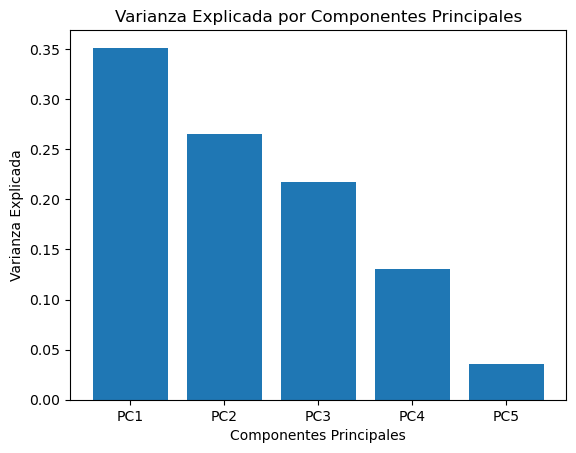

In [5]:
plt.bar(components, explained_variance)
plt.xlabel("Componentes Principales")
plt.ylabel("Varianza Explicada")
plt.title("Varianza Explicada por Componentes Principales")
plt.show()




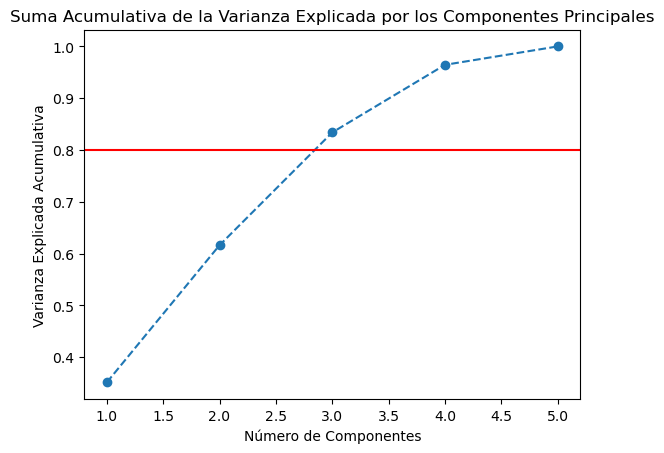

In [6]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = len(pca.explained_variance_ratio_)
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker="o", linestyle="--")
plt.axhline(y=0.80, color="r", linestyle="-")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulativa")
plt.title("Suma Acumulativa de la Varianza Explicada por los Componentes Principales")
plt.show()

In [7]:
#en el gráfico anterior, podemos ver que con 3 compoentes capturamos el 80% de la explicación de la varianza, por lo que
#corremos nuevamente el modelo, solo que esta vez seleccionamos 3 componentes, y éste sería nuestro modelo de PCA final
n_components=3
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)
components=[]
n=1
while n<=n_components:
    components.append("PC"+str(n))
    n=n+1
principal_df = pd.DataFrame(data=principal_components, columns=components)
explained_variance = pca.explained_variance_ratio_
print("Varianza Explicada:", explained_variance)

Varianza Explicada: [0.35145976 0.2648177  0.2176865 ]


In [8]:
variable_names = df.columns
components_df = pd.DataFrame(pca.components_, columns=variable_names, index=components)

In [9]:
print("Contribuciones de las variables originales a los componentes principales:\n")
components_df

Contribuciones de las variables originales a los componentes principales:



,temperatura,presion,velocidad_extrusion,humedad,tiempo_enfriamiento
PC1,0.317570,0.285263,-0.303279,0.678848,-0.514745
PC2,-0.522874,0.576283,-0.289159,0.250844,0.497962
PC3,-0.363029,-0.584082,-0.715617,0.002873,-0.122238


Para interpretar estos resultados, vamos a analizar las contribuciones de cada variable original en cada componente principal. Los valores más altos en magnitud indican una mayor contribución de esa variable a la formación del componente principal.

**PC1:**
- La humedad (0.6788) tiene la mayor contribución positiva, seguida por la temperatura (0.3176) y la presión (0.2853).
- La velocidad de extrusión (-0.3033) y el tiempo de enfriamiento (-0.5147) tienen contribuciones negativas.
- Este componente principal podría representar la relación entre la humedad y el equilibrio entre la temperatura, la presión, la velocidad de extrusión y el tiempo de enfriamiento.

**PC2:**
- La presión (0.5763) y el tiempo de enfriamiento (0.4979) tienen las mayores contribuciones positivas, seguida por la humedad (0.2508).
- La temperatura (-0.5229) y la velocidad de extrusión (-0.2892) tienen contribuciones negativas.
- Este componente principal podría representar la relación entre la presión y el tiempo de enfriamiento frente a la temperatura y la velocidad de extrusión.

**PC3:**
- La humedad (0.0029) tiene una contribución positiva muy pequeña.
- La temperatura (-0.3630), la presión (-0.5841), la velocidad de extrusión (-0.7156) y el tiempo de enfriamiento (-0.1222) tienen contribuciones negativas.
- Este componente principal podría representar cómo la velocidad de extrusión afecta negativamente a las otras variables, con la presión y la temperatura también contribuyendo negativamente.

En resumen, estos componentes principales revelan información sobre las relaciones entre las variables originales y cómo interactúan entre sí. Es importante tener en cuenta que la interpretación de los componentes principales puede ser subjetiva y depende del conocimiento del dominio y del contexto del problema.